# [EX02]LinearRegression

## Project 1. 당뇨병 수치 맞춰보기

### Step 1. 환경설정
1. 필요한 모듈 불러오고
2. 데이터 불러올 준비하고
3. 데이터 불러와서 간단 정보 확인하고

In [173]:
# 필요한 모듈 불러오기
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
print(sklearn.__version__)
# 모델 및 평가지표 불러오기
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
%matplotlib Inline
%config InlineBackend.figure_format ='retina'
 

1.0


### Step 2. 데이터 불러와서 내용 확인

In [174]:
# 데이터 불러오기 : sklearn에서 제공하는 데이터셋 이용
diabetes = load_diabetes()

# 데이터유형 확인 => bunch : 딕셔너리와 유사한 데이터타입
type(diabetes)


sklearn.utils.Bunch

In [175]:
# key 값으로 구성이 어떻게 되어 있는지 확인
print(diabetes.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [176]:
print(diabetes.data)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]


In [177]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [178]:
print(diabetes.feature_names)
# bmi : 체질량지수 = 몸무게 /() 키의 제곱)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [179]:
df_X = pd.DataFrame(diabetes.data)

In [180]:
df_y = pd.DataFrame(diabetes.target)

In [181]:
df_X

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


### Q. 컬럼명칭에는 성별과 이름으로 되어 있는데 데이터에는 숫자로 되어 있는 이유? 
### A. 범주형 데이터를 Nomalization 처리를 통해 수치형으로 변환했기 때문.  * 일반적인 경우에 원본 데이터가 미리 처리되어 있지 않기 때문에 필요에 따라 처리를 해 줘야 함. 

In [182]:
df_y

,0
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


### Step 3. 데이터 준비

1. 데이터를 어레이로 저장
2. 데이터를 학습용, 테스트용으로 분리

In [183]:
# 어레이로 저장
X = df_X.values
y = df_y.values

In [184]:
# 데이터 분리하고 확인
X_train, X_test = train_test_split(X, test_size=0.2, random_state=32)
print(len(X_train), len(X_test))

353 89


In [185]:
y_train, y_test = train_test_split(y, test_size=0.2, random_state=32)

In [186]:
X_train

array([[ 0.06350368,  0.05068012,  0.08864151, ...,  0.07120998,
         0.02930041,  0.07348023],
       [ 0.02354575,  0.05068012, -0.02021751, ..., -0.03949338,
        -0.09643322, -0.01764613],
       [ 0.03444337,  0.05068012, -0.02991782, ..., -0.00259226,
         0.02405258, -0.03835666],
       ...,
       [-0.00551455,  0.05068012,  0.00133873, ..., -0.03949338,
        -0.04118039, -0.08806194],
       [ 0.01991321, -0.04464164, -0.02345095, ..., -0.0763945 ,
        -0.0425721 ,  0.07348023],
       [ 0.02717829,  0.05068012,  0.09403057, ..., -0.00259226,
         0.0366458 ,  0.10661708]])

### Step 4. 학습 및 예측

In [187]:
# w와 b 설정 : feature수는 10개

w = np.random.rand(10)
b = np.random.rand()

In [188]:
# 모델 선택 
#def model(X, w, b):
#    predics = 0
#    for i in range(10):
#        predics += X[:,i] *w[i]
#    predics += b
#    return predics

model = LinearRegression()

In [189]:
# 훈련
model.fit(X_train, y_train)

# 모델 예측
y_predic = model.predict(X_test)

In [190]:
y_predic

array([[172.6026195 ],
       [176.28148119],
       [104.69585481],
       [123.72910575],
       [125.12878964],
       [175.52777643],
       [221.40111622],
       [160.84217484],
       [216.01723864],
       [188.23640164],
       [ 95.28169994],
       [238.58023188],
       [223.41367966],
       [ 69.82514443],
       [105.76126405],
       [ 55.78164153],
       [116.03897361],
       [146.99490029],
       [178.51895098],
       [147.16712575],
       [110.60322975],
       [156.88163267],
       [ 82.29902838],
       [185.57040119],
       [145.62898108],
       [165.09134886],
       [291.17713684],
       [242.86947318],
       [211.9319605 ],
       [287.46059301],
       [196.59189228],
       [127.43915807],
       [209.83861506],
       [183.15819322],
       [150.20566019],
       [114.49393354],
       [195.96237776],
       [213.02842684],
       [ 98.99933821],
       [ 91.55444562],
       [225.41194118],
       [103.49376254],
       [133.7647088 ],
       [160

In [191]:
# 손실함수 정의
def loss(X, w, b, y):
    predics = model(X, w, b)
    L = mean_squared_error(y_test, predics)**0.5
    return L

In [192]:
# Gradient 함수 정의
def gradient(X, w, b, y):
    # N은 가중치의 개수
    N = len(w)
    
    # y_predic 준비
    y_predic = model(X, w, b)
    
    # 공식에 맞게 gradient 계산
    dw = 1/N * 2 * X.T.dot(y_predic - y)
        
    # b의 gradient 계산
    db = 2 * (y_predic - y).mean()
    return dw, db

In [193]:
# HYPER PARAMETER : LEARNINT_RATE 설정
LEARNING_RATE = 0.0001

In [194]:
# 손실함수 값을 저장할 변수 선언
losses = []

for i in range(1, 1001):
    dw, db = gradient(X_train, w, b, y_train)
    w -= LEARNING_RATE * dw
    b -= LEARNING_RATE * db
    L = loss(X_train, w, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

TypeError: 'LinearRegression' object is not callable

### ! 여기서 실제 진행은 멈췄음. typeError: 'LinearRegression' object is not callable' 를 해결하지 못함
### > 구글링을 해 보니 클래스와 오브젝트를 혼돈하여 썼기 때문이라는데... 코드는 기존의 다른 코드랑 비교해서 틀린 곳이 없는데... 이유를 모르겠음.

### 이후의 코드는 작성했으나 이 오류로 인해 실행 확인을 하지 못함.

### Step 5. 성능확인

In [ ]:
# 손실함수 값을 시각적으로 확인해 봄
plt.plot(losses)
plt.show()

In [ ]:
# 현 시점의 w, b를 확인해 봄
w, b

In [ ]:
# X_test, y_test에 대해서 확인해 봄
predic = model(X_test, w, b)
rmse = loss(X_test, w, b, y_test)**0.5
rmse

In [ ]:
# 결과 시각화
plt.scatter(X_test[:,0], y_test, label="true")
plt.scatter(X_test[:,0], predic, label="prediction")
plt.legend()
plt.show()

## Project 2. 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람 맞추기

In [195]:
# 데이터경로 설정
# mkdir -p ~/aiffel/bike-sharing-demand/data
# ln -s ~/data/* ~/aiffel/bike-sharing-demand/data
import os
original_train = pd.read_csv("~/aiffel/bike-sharing-demand/data/data/bike-sharing-demand/train.csv")

# 데이터 가져와서 기본정보 확인하기
train = original_train
print(train.shape)
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [196]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [206]:
print(train.describe())
# 시즌 1~4
# 휴일 1, 2
# 평일
# 날씨
# temp 기온
# atemp
# 습도
# 바람
# 현장대여
# 예약대여
# 합계대여
# 년도
# 월
# 일
# 시간

             season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.96047

In [198]:
# datetime 컬럼을 자료형으로 변환하고 연, 월, 일, 시 초까지 새로운 컬럼 생성

In [199]:
from datetime import datetime

In [200]:
train['datetime'] = pd.to_datetime(train['datetime'])

In [201]:
# 년도 추출하기
train['year']=train['datetime'].dt.year
print(train['year'])

# 날짜 추출하기
train['month']=train['datetime'].dt.month
 
# 시간 추출하기
train['day']=train['datetime'].dt.day
  
# 분 추출하기
train['hour']=train['datetime'].dt.hour

# 초 추출하기
train['minute']=train['datetime'].dt.minute
      
# 초 추출하기
train['second']=train['datetime'].dt.second

0        2011
1        2011
2        2011
3        2011
4        2011
         ... 
10881    2012
10882    2012
10883    2012
10884    2012
10885    2012
Name: year, Length: 10886, dtype: int64


<AxesSubplot:xlabel='hour', ylabel='count'>

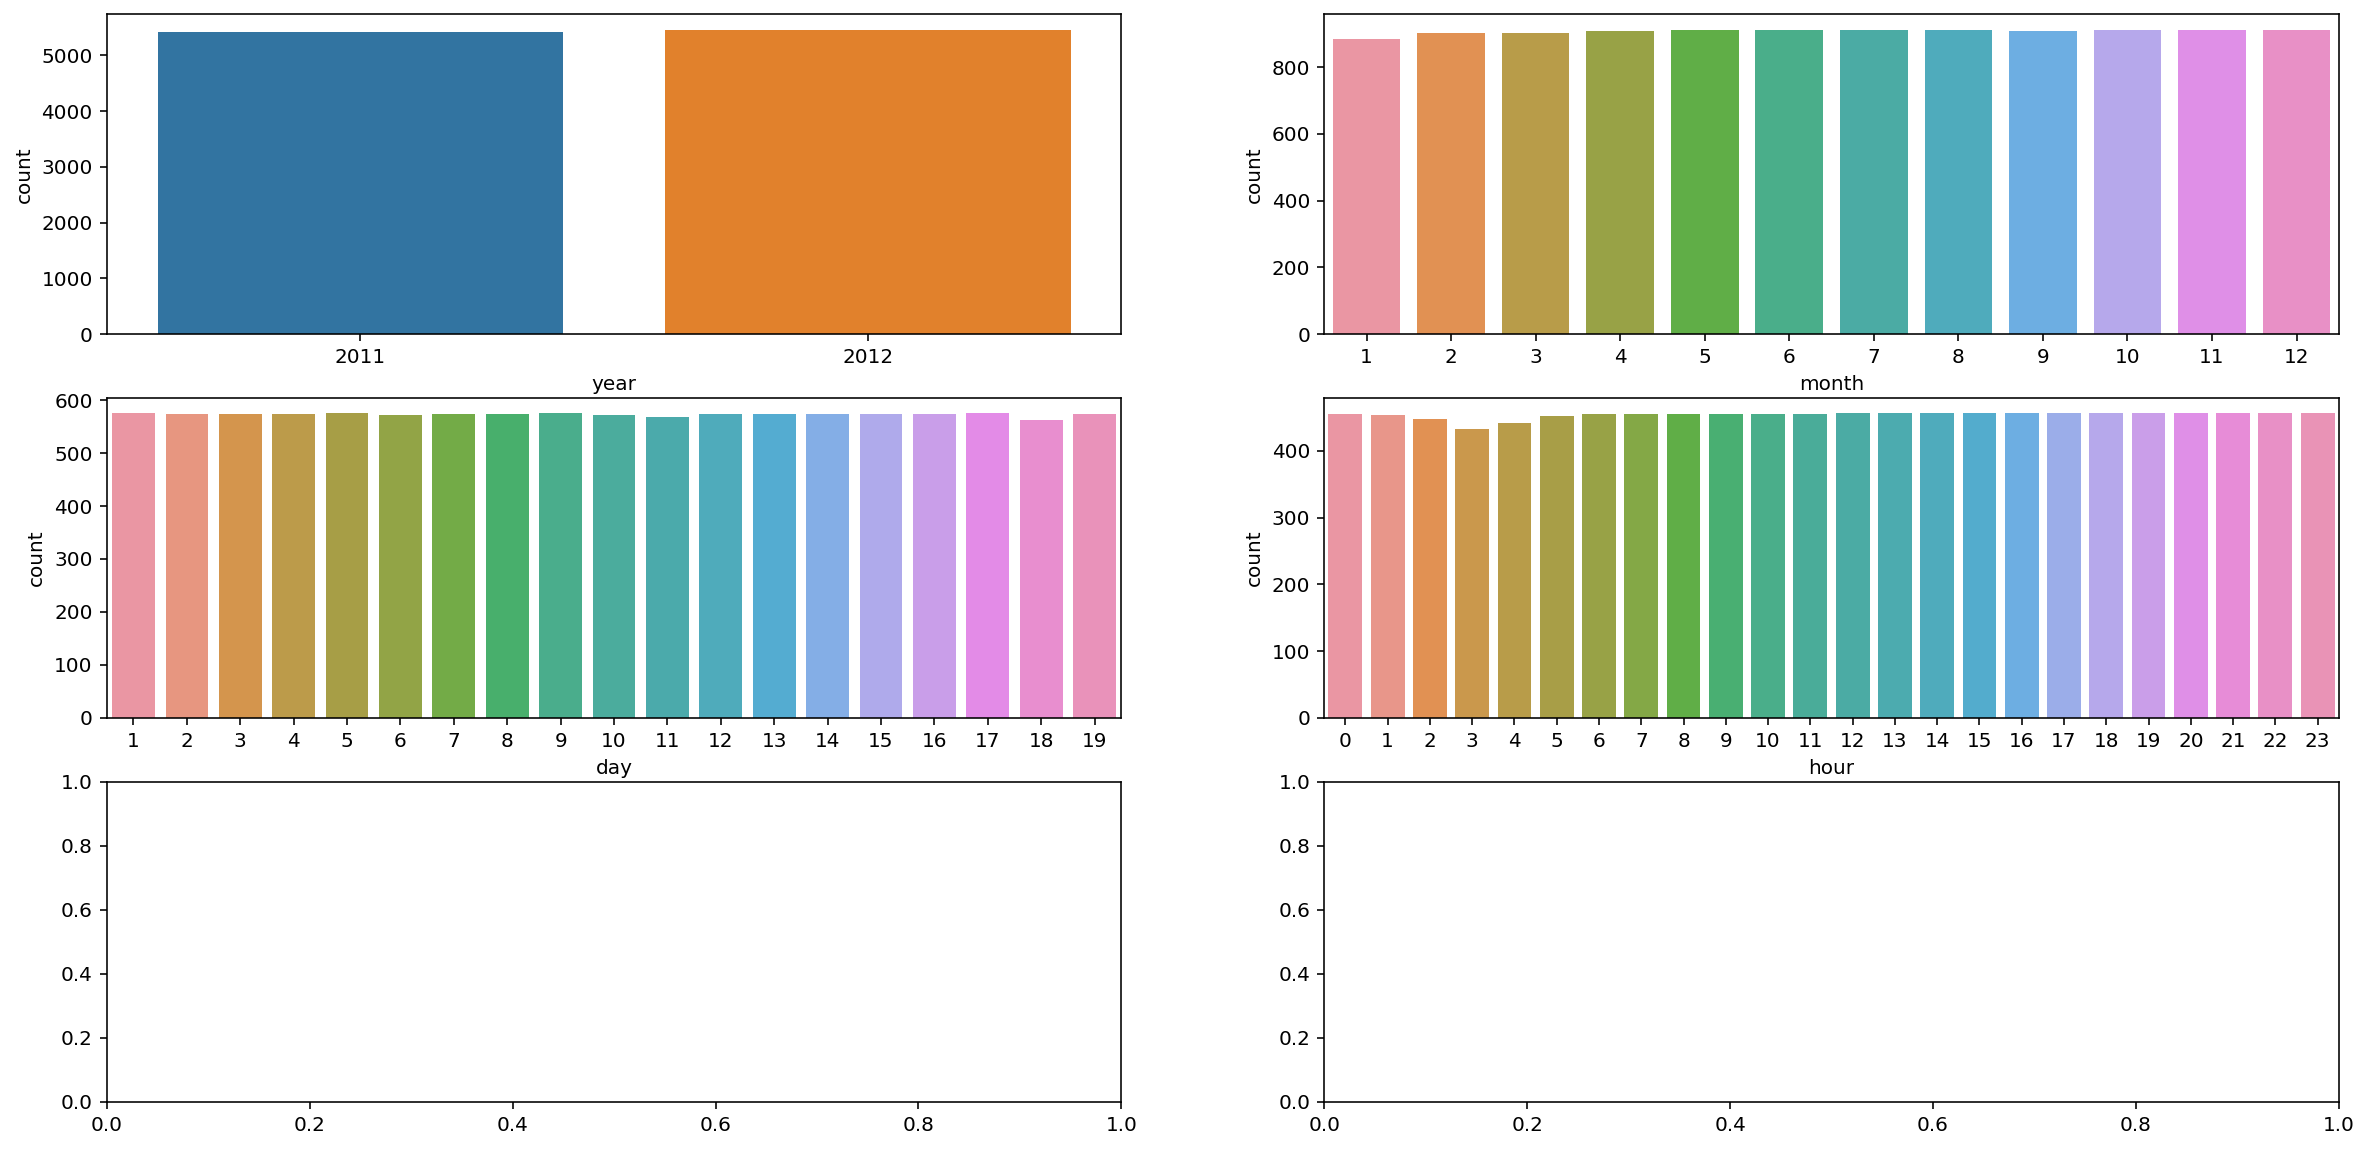

In [210]:
# 그래프를 통해 데이터 이해
fig, ((ax1, ax2),(ax3, ax4),(ax5, ax6)) = plt.subplots(nrows=3, ncols=2)
fig.set_size_inches(20, 10)

sns.countplot(data=train, x="year", ax=ax1)
sns.countplot(data=train, x="month", ax=ax2)
sns.countplot(data=train, x="day", ax=ax3)
sns.countplot(data=train, x="hour", ax=ax4)


In [204]:
train = train.drop(['minute', 'second'], axis=1)

In [205]:
print(train.corr())

              season   holiday  workingday   weather      temp     atemp  \
season      1.000000  0.029368   -0.008126  0.008879  0.258689  0.264744   
holiday     0.029368  1.000000   -0.250491 -0.007074  0.000295 -0.005215   
workingday -0.008126 -0.250491    1.000000  0.033772  0.029966  0.024660   
weather     0.008879 -0.007074    0.033772  1.000000 -0.055035 -0.055376   
temp        0.258689  0.000295    0.029966 -0.055035  1.000000  0.984948   
atemp       0.264744 -0.005215    0.024660 -0.055376  0.984948  1.000000   
humidity    0.190610  0.001929   -0.010880  0.406244 -0.064949 -0.043536   
windspeed  -0.147121  0.008409    0.013373  0.007261 -0.017852 -0.057473   
casual      0.096758  0.043799   -0.319111 -0.135918  0.467097  0.462067   
registered  0.164011 -0.020956    0.119460 -0.109340  0.318571  0.314635   
count       0.163439 -0.005393    0.011594 -0.128655  0.394454  0.389784   
year       -0.004797  0.012021   -0.002482 -0.012548  0.061226  0.058540   
month       

## [ 루브릭 ]
---
### 1. 프로젝트1의 회귀모델 예측 정확도 : 기준 mse 손실함수값 3,000이하

### 2. 프로젝트2의 회귀모델 예측 정확도 : 기준 rmse 값 150 이하 달성

### 3. 시각화 요구사항이 정확하게 이루어졌는가? :

#### * 데이터 개수 시각화 진행 여부
#### * 예측 결과 시각화 진행 여부
#### * 예측과 실제 데이터가 크게 분리되지 않고 비슷한가?

## [ 회고 ]

#### 이제 제출 34분 남짓 남았으니 일단 회고를 작성합니다.. ㅠㅠ<br><br> 두번째 Ex 제출인데.. 이번엔 아예 실행까지 시켜보지도 못했네요.<br><br> 분명히 남들보다, 최소한, 많은 시간을 투입하고 있는데 <br><br> 들어오는 내용들을 소화시키지 못하고 있다고 생각이 됩니다. <br><br> 전반적인 개념에 대해서는 지난 주말에 복습을 통해 <br><br> 어느 정도 이해가 되었다고 생각했지만 <br><br> 코드를 짜는 과정에서 각 노드의 세부적인 내용들을 이해하면서 <br><br>  코드를 짜려고 하니 아직 충분치 않은 것 같네요. <br><br><br>좌절하게 되는 밤이지만 아직 좌절은 이르거겠죠... "시작은 미약하나 끝은 창대할지니~"
